In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Load the audio file
file_path = "C:\\Users\\Tarun\\Documents\\Project SP\\Fake-Or-Real (FoR)\\for-2seconds\\validation\\fake\\file48.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav"
y, sr = librosa.load(file_path, sr=None)

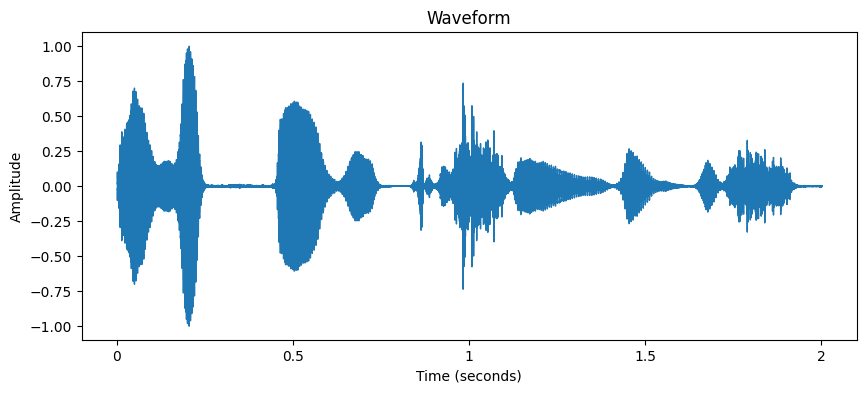

In [7]:
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [8]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)

In [9]:
# Convert to dB scale (log scale)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

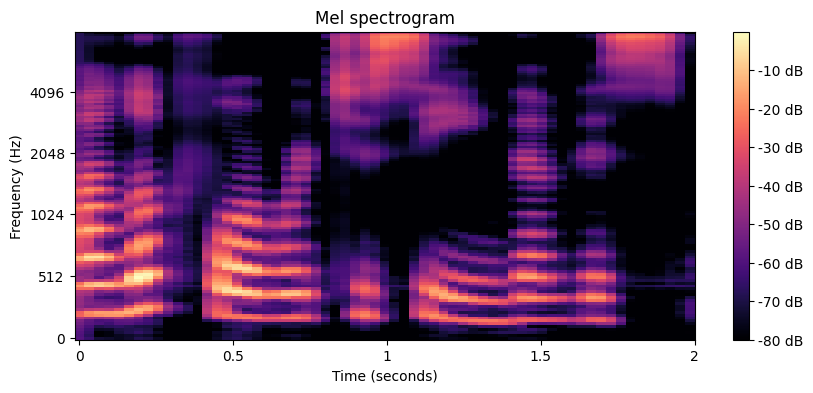

In [10]:
# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

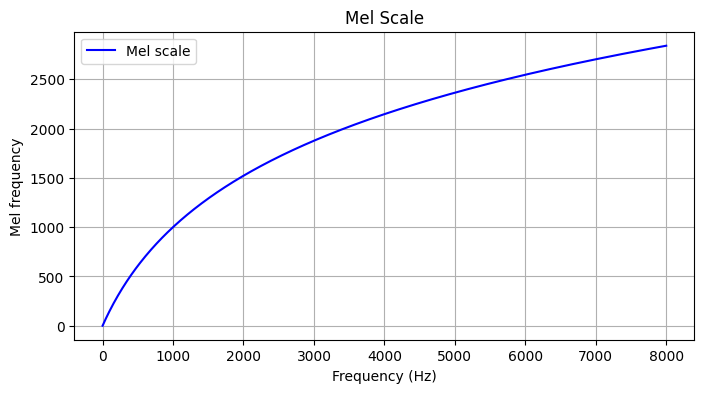

In [11]:
linear_freqs = np.linspace(0, 8000, num=513)  # Sampled at 16 kHz, Nyquist frequency is 8000 Hz

# Convert linear frequency to Mel scale
def hz_to_mel(f):
    return 2595 * np.log10(1 + f / 700)

# Convert Mel scale to linear frequency
def mel_to_hz(m):
    return 700 * (10**(m / 2595) - 1)

# Compute Mel scale
mel_freqs = hz_to_mel(linear_freqs)

# Plot Mel scale against linear frequency
plt.figure(figsize=(8, 4))
plt.plot(linear_freqs, mel_freqs, label='Mel scale', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel frequency')
plt.title('Mel Scale')
plt.grid(True)
plt.legend()
plt.show()

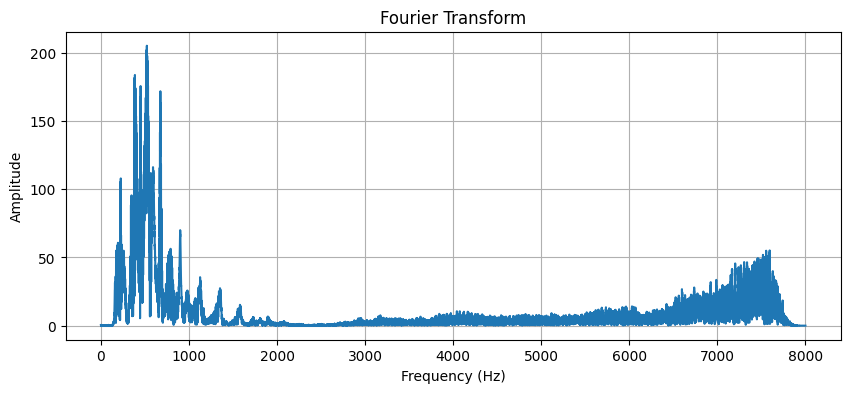

In [15]:
# Perform Fourier transform
fourier_transform = np.fft.fft(y)

# Frequency domain representation
frequencies = np.fft.fftfreq(len(y), 1/sr)

# Plot the Fourier transform (right half)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_transform = fourier_transform[:len(frequencies)//2]

plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, np.abs(positive_transform))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


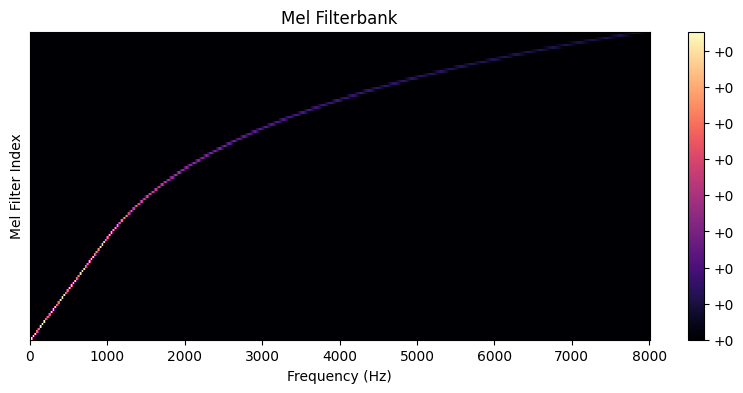

In [18]:
n_fft = 2048  # Number of FFT points
n_mels = 128  # Number of Mel filterbanks
mel_filterbanks = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

# Visualize the Mel filterbank
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_filterbanks, sr=sr, x_axis='linear')
plt.colorbar(format='%+2.0f')
plt.title('Mel Filterbank')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Filter Index')
plt.show()